In [ ]:
# !pip install JPype1
# !pip install konlpy
# !pip install wordcloud
# !pip install nltk

In [1]:
with open('data-files/constitution.txt') as f:
    constitution = f.read()

In [2]:
constitution

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure domestic Tranquility, provide for the common defence, promote the general Welfare, and secure the Blessings of Liberty to ourselves and our Posterity, do ordain and establish this Constitution for the United States of America.\n\nArticle. I.\n\nSection. 1.\n\nAll legislative Powers herein granted shall be vested in a Congress of the United States, which shall consist of a Senate and House of Representatives.\n\nSection. 2.\n\nThe House of Representatives shall be composed of Members chosen every second Year by the People of the several States, and the Electors in each State shall have the Qualifications requisite for Electors of the most numerous Branch of the State Legislature.\n\nNo Person shall be a Representative who shall not have attained to the Age of twenty five Years, and been seven Years a Citizen of the United States, and who shall not, when elected, be an Inhabitant of that

In [3]:
constitution[:100]

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure'

In [4]:
from wordcloud import WordCloud

In [5]:
wc = WordCloud()
wc_model = wc.generate(constitution)

In [6]:
# wc_model.words_
wc_model.to_array().shape # 가로, 세로, 픽셀


(200, 400, 3)

In [7]:
import matplotlib.pyplot as plt


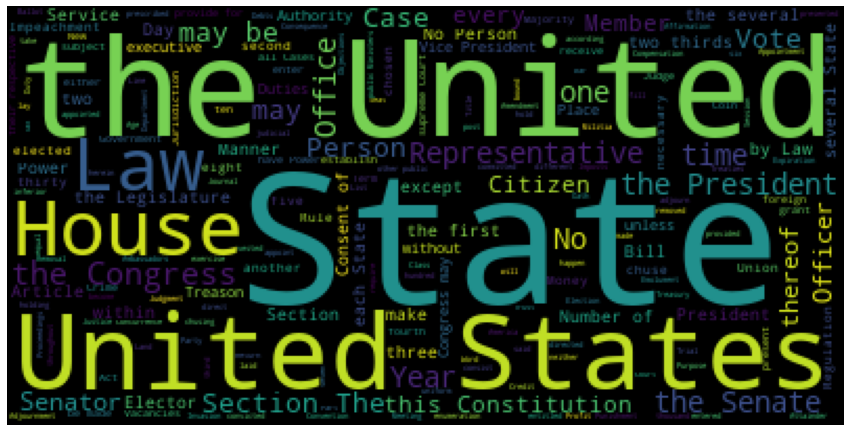

In [8]:
plt.figure(figsize=(15, 10))
plt.imshow(wc_model, interpolation='antialiased')
plt.axis('off') # 축 안보이기
plt.show()

In [9]:
from konlpy.corpus import kolaw

In [10]:
with kolaw.open('constitution.txt') as f:
    ko_constitution = f.read()

In [11]:
ko_constitution[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [12]:
from konlpy.tag import Twitter

In [13]:
t = Twitter() # 한글 사전을 기반으로 형태소 분석

C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [14]:
ko_tokens = t.nouns(ko_constitution)
ko_tokens[:100]

one_word_token = []
for token in ko_tokens:
    if len(token) == 1 and token not in one_word_token:
        one_word_token.append(token)
# one_word_token

In [15]:
stop_words = ['제', '월', '일', '조', '수', '때', '그', '이', '바', '및', '안', '것']
ko_tokens2 = [ token for token in ko_tokens if token not in stop_words]
# ko_tokens2

In [16]:
import numpy as np
import pandas as pd

In [17]:
tmp = np.unique(ko_tokens2, return_counts=True)
tmp_df = pd.DataFrame({ 'word' : tmp[0], 'cnt': tmp[1]})
tmp_df.sort_values(by=['cnt'], ascending=False).head()

,word,cnt
302,법률,127
652,정,89
214,대통령,83
101,국가,73
122,국회,68


In [18]:
import nltk

In [19]:
ko_model = nltk.Text(ko_tokens2)
ko_model.vocab()
ko_data = ko_model.vocab().most_common(100) # 가장 잘 나오는거 100개
ko_data[:10]

[('법률', 127),
 ('정', 89),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('헌법', 53),
 ('모든', 37),
 ('위', 36)]

In [20]:
from PIL import Image
korea_map = Image.open('data-files/korea-map.jpg')
korea_map_array = np.array(korea_map)
korea_map_array.shape

(727, 489, 3)

In [21]:
ko_data_dict=dict(ko_data) # {단어 : 빈도수}
wc = WordCloud(font_path=r"C:\YJ\workspace\python\nb-workspace\data-analysis\fonts\NanumGothic.ttf", mask=korea_map_array, background_color='white')
wc_model2 = wc.generate_from_frequencies(ko_data_dict)

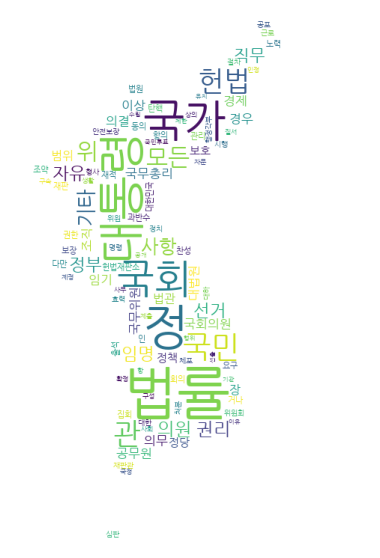

In [22]:
plt.figure(figsize=(15,10))
plt.imshow(wc_model2)
plt.axis('off')
plt.show()

In [ ]:
# 연설문 워드클라우드 -> 텍스트 복사 하지말고 웹크롤링으로 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup, NavigableString, Tag, Comment

In [ ]:
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=018&aid=0000254833'
query = 'mode={1}&mid={2}&sid1={3}&oid={4}&aid={5}'
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'html.parser')


In [168]:
text = soup.select('#articleBodyContents')
text

html=text.copy()
html
content_string=""
for cleaned in html:
        # print(child, '/', type(child))
        if type(cleaned) == Tag and cleaned.name != "script":
            content_string += cleaned.text.strip() + " "
        if type(cleaned) == NavigableString:
            content_string += str(cleaned).strip() + " "
    print(cleaned)
# for line in html:
#     line=html.replace('<br>','')
# # for line in html:
#     line.append(html)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)